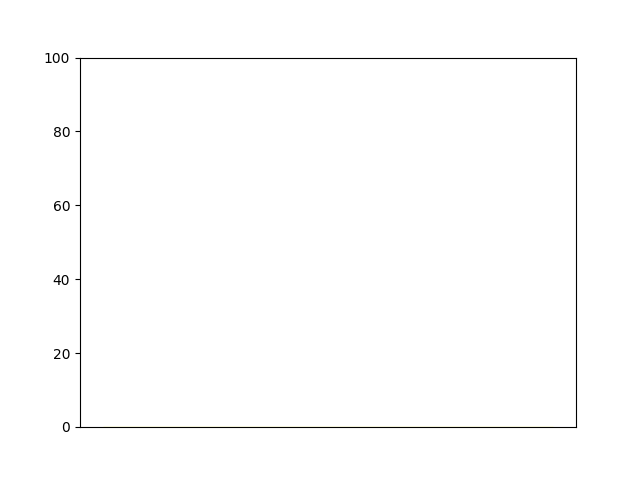

In [1]:
%matplotlib widget 

import random
import functools

import matplotlib.pyplot as plt

import matplotlib.animation as animation

import sort_funcs
from importlib import reload
reload(sort_funcs)

from sort_funcs import gen_merge_sort_with_more_yields

# set bins and numbers
n = 10
hist_bins = list(range(n+1))  # edges = bins + 1
numbers = random.sample(population=list(range(20, 100)), k=n)

# set plot
fig, ax = plt.subplots()
default_color = "green"
hightlight_color = "pink"
_, _, bar_container = ax.hist(x=[], bins=hist_bins, lw=1,
                              ec="yellow", fc=default_color, alpha=0.5)

# remove unnecessary details for cleaner look
ax.set_ylim(top=100)
ax.set_xticklabels([])         
plt.tick_params(bottom=False)  


def animate(new_heights, bar_container):
    for height, patch in zip(new_heights, bar_container.patches):
        current_height = patch.get_height()
        if current_height == 0:  # first frame
            patch.set_height(height)
        elif current_height != height:
            patch.set_height(height)
            patch.set_facecolor(hightlight_color)  # the numbers that swapped positions
        else:
            patch.set_facecolor(default_color)  # default color
    return bar_container.patches


func = functools.partial(animate, bar_container=bar_container)
func_animation = animation.FuncAnimation(fig=fig, func=func, 
                                         interval=400,           
                                         frames=gen_merge_sort_with_more_yields(numbers),
                                         blit=True, 
                                         repeat=False,
                                         cache_frame_data=False)  # to suppress warning


plt.show()


In [3]:
from itertools import zip_longest

from importlib import reload
import sort_funcs
reload(sort_funcs)

from sort_funcs import (gen_bubble_sort, gen_insertion_sort, 
                        gen_merge_sort, gen_merge_sort_with_more_yields, 
                        gen_quicksort, k_gen_quicksort)

nums = [5, 1, 2, 3]
for results in zip_longest(gen_bubble_sort(nums), gen_insertion_sort(nums), 
                           gen_merge_sort(nums),gen_merge_sort_with_more_yields(nums), 
                           gen_quicksort(nums), k_gen_quicksort(nums),
                           fillvalue=sorted(nums)):
    print(results)

([5, 1, 2, 3], [5, 1, 2, 3], [5, 1, 2, 3], [5, 1, 2, 3], [5, 1, 2, 3], [5, 1, 2, 3])
([1, 5, 2, 3], [1, 5, 2, 3], [1, 5, 2, 3], [1, 5, 2, 3], [1, 5, 2, 3], [1, 5, 2, 3])
([1, 2, 5, 3], [1, 2, 5, 3], [1, 2, 3, 5], [1, 2, 5, 3], [1, 2, 5, 3], [1, 2, 5, 3])
([1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5])
([1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5])
([1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5])
([1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5])


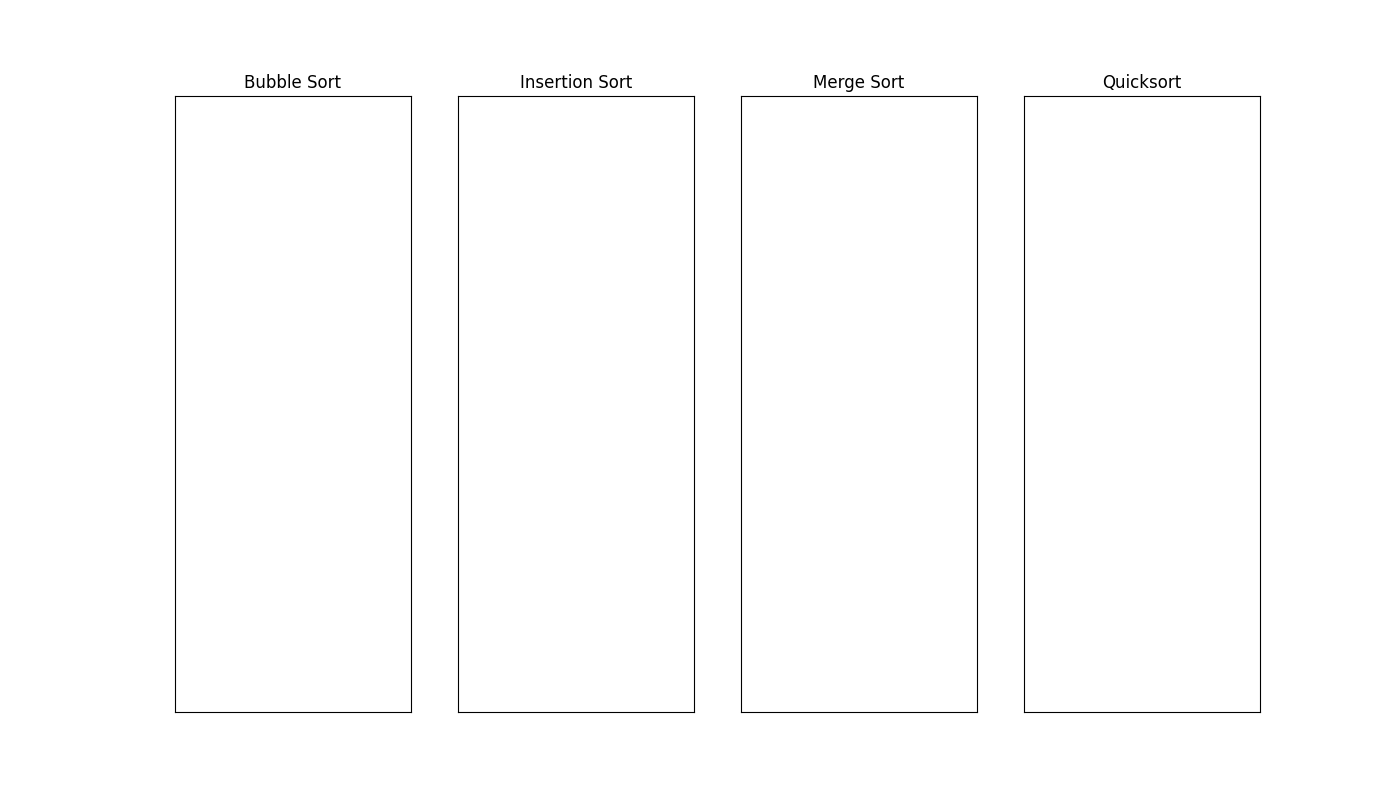

In [7]:
%matplotlib widget 

import random
import functools
from itertools import zip_longest

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from importlib import reload
import sort_funcs
reload(sort_funcs)

from sort_funcs import (gen_bubble_sort, gen_insertion_sort, 
                        gen_merge_sort_with_more_yields, gen_quicksort)


# set bins and numbers
n = 12
hist_bins = list(range(n+1))  # edges = bins + 1
num_min = 40
num_max = 100
numbers = [random.randint(num_min, num_max) for _ in range(n)]

# set figure
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)
fig.set_size_inches(14, 8)

# remove ticks and labels for a clean look
axs = [ax1, ax2, ax3, ax4]
plt.setp(axs, xticks=[], yticks=[], ylim=(num_min * 0.5, num_max * 1.05)) 

titles=['Bubble Sort', 'Insertion Sort', 'Merge Sort', 'Quicksort']

for ax, title in zip(axs, titles):
    ax.set_title(title)

# set frames for animation
frames = zip_longest(gen_bubble_sort(numbers), gen_insertion_sort(numbers), 
                     gen_merge_sort_with_more_yields(numbers), gen_quicksort(numbers),
                     fillvalue=sorted(numbers))

# set histograms
default_color = "green"
hightlight_color = "pink"
edge_color = "yellow"


# ugly repeated lines, but has to keep a reference to each bar_container
_, _, bar_container1 = ax1.hist(x=[], bins=hist_bins, lw=1, ec=edge_color, fc=default_color, alpha=0.5)
_, _, bar_container2 = ax2.hist(x=[], bins=hist_bins, lw=1, ec=edge_color, fc=default_color, alpha=0.5)
_, _, bar_container3 = ax3.hist(x=[], bins=hist_bins, lw=1, ec=edge_color, fc=default_color, alpha=0.5)
_, _, bar_container4 = ax4.hist(x=[], bins=hist_bins, lw=1, ec=edge_color, fc=default_color, alpha=0.5)
bar_containers = [bar_container1, bar_container2, bar_container3, bar_container4]

# for a cleaner look
plt.tick_params(left=False, bottom=False,
                labelleft=False, labelbottom=False)

def animate(new_heights, bar_containers):
    for heights, bar_container in zip(new_heights, bar_containers):
        for height, patch in zip(heights, bar_container.patches):
            current_height = patch.get_height()
            if current_height == 0:  # first frame
                patch.set_height(height)
            elif current_height != height:
                patch.set_height(height)
                patch.set_facecolor("pink")  # highlight the numbers that swapped positions
            else:
                patch.set_facecolor("green")  # default color
    return bar_containers

func_x = functools.partial(animate, bar_containers=bar_containers)

func_animation = animation.FuncAnimation(fig=fig, 
                                        #  func=func, 
                                            func=func_x,
                                            interval=400,           
                                            # frames=sort_func(numbers),
                                            frames=frames,
                                            blit=True, 
                                            repeat=False,
                                            cache_frame_data=False)  # to suppress warning

plt.show()


In [10]:
from importlib import reload
import sort_funcs
reload(sort_funcs)

from sort_funcs import gen_bubble_sort, gen_insertion_sort, gen_merge_sort_with_more_yields, gen_quicksort


nums = [random.randint(20, 200) for _ in range(16)]

bubble_results = [str(result) for result in gen_bubble_sort(nums)]
merge_results = [str(result) for result in gen_merge_sort_with_more_yields(nums)]
insert_results = [str(result) for result in gen_insertion_sort(nums)]
quick_results = [str(result) for result in gen_quicksort(nums)]

print(f"bubble sort: {len(set(bubble_results))}/{len(bubble_results)}")
print(f"merge sort: {len(set(merge_results))}/{len(merge_results)}")
print(f"insertion sort: {len(set(insert_results))}/{len(insert_results)}")
print(f"quick sort: {len(set(quick_results))}/{len(quick_results)}")


bubble sort: 69/70
merge sort: 27/28
insertion sort: 69/70
quick sort: 25/26
